## 11.4. 随机梯度下降

In [1]:
%matplotlib inline
import math
import mindspore
from d2l import mindspore as d2l

### 11.4.1. 随机梯度更新

epoch 50, x1: 0.258773, x2: 0.147647


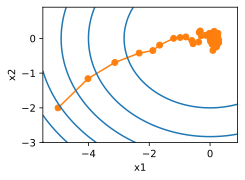

In [2]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += d2l.normal((1,), 0.0, 1.)
    g2 += d2l.normal((1,), 0.0, 1.)
    eta_t = eta * lr()
    return (x1 - eta_t * g1[0], x2 - eta_t * g2[0], 0, 0)


def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

### 11.4.2. 动态学习率

epoch 1000, x1: -0.831556, x2: -0.093116


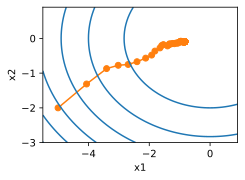

In [3]:
def exponential_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: 0.002303, x2: -0.127476


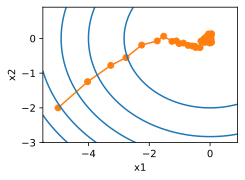

In [4]:
def polynomial_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))